In [88]:
import pandas as pd
import scipy.stats as stats
# if outputs not displayed, use the following link: https://github.com/daviddeket/Master-DSC-Analyse-Design/blob/master/HUE1.ipynb

In [89]:
# read in pizza_delivery.csv into pandas data frame
df = pd.read_csv('pizza_delivery.csv')
df.head()

,day,date,time,operator,branch,driver,temperature,bill,pizzas,free_wine,got_wine,discount_customer
0,Thursday,01-May-14,35.128367,Laura,East,Bruno,68.287716,58.4,4,0,0,1
1,Thursday,01-May-14,25.203074,Melissa,East,Salvatore,70.997791,26.4,2,0,0,0
2,Thursday,01-May-14,45.643404,Melissa,West,Salvatore,53.394145,58.1,3,1,0,0
3,Thursday,01-May-14,29.374298,Melissa,East,Salvatore,70.306596,35.2,3,0,0,0
4,Thursday,01-May-14,29.994610,Melissa,West,Salvatore,71.501688,38.4,2,0,0,0


In [90]:
# show number of empty values in each column
df.isnull().sum()

day                  0
date                 0
time                 0
operator             0
branch               0
driver               0
temperature          0
bill                 0
pizzas               0
free_wine            0
got_wine             0
discount_customer    0
dtype: int64

In [91]:
# check if duplicated of rows exist
df.duplicated().sum()

0

In [92]:
# create table of absolute frequencies of branches
branch_freq = df['branch'].value_counts()
branch_freq

West      435
Centre    421
East      410
Name: branch, dtype: int64

In [93]:
# create table of relative frequencies of branches
branch_freq_rel = df['branch'].value_counts(normalize=True)
branch_freq_rel

West      0.343602
Centre    0.332543
East      0.323855
Name: branch, dtype: float64

<AxesSubplot:>

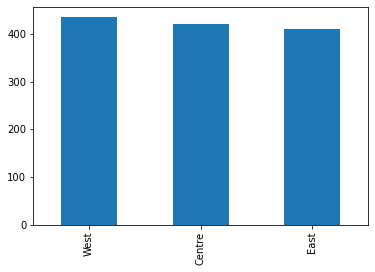

In [94]:
# create bar graph from frequency of operators
branch_freq.plot.bar()

<AxesSubplot:>

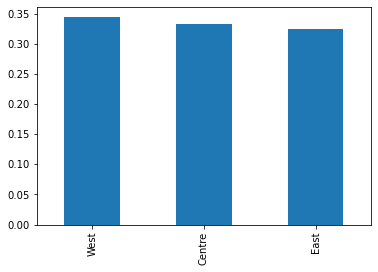

In [95]:
# create bar graph from relative frequency of operators
branch_freq_rel.plot.bar()

<AxesSubplot:>

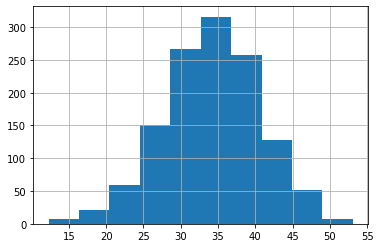

In [96]:
# create histogram of time to delivery
df['time'].hist()

In [97]:
# calculate mean, median, min, max, first quartile, third quartile for all numerical columns in df
df.describe()

,time,temperature,bill,pizzas,free_wine,got_wine,discount_customer
count,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000
mean,34.229551,62.863950,42.755924,3.013428,0.180885,0.148499,0.218009
std,6.461478,6.905708,11.222918,1.467102,0.385075,0.355735,0.413057
min,12.266028,41.758718,9.100000,1.000000,0.000000,0.000000,0.000000
25%,30.061151,58.242364,35.500000,2.000000,0.000000,0.000000,0.000000
50%,34.381964,62.926657,42.900000,3.000000,0.000000,0.000000,0.000000
75%,38.577021,67.228628,50.500000,4.000000,0.000000,0.000000,0.000000
max,53.096264,87.582422,75.000000,11.000000,1.000000,1.000000,1.000000


In [98]:
# mean duration to delivery = 34.22955 minutes
# H0: mu <= mu0 -> mean time to delivery <= 30 minutes
# H1: mu > mu0 -> mean time to delivery > 30 minutes
# one sample one-sided t-test
stats.ttest_1samp(df['time'], 30, alternative='greater')
# p-value = 0.0001 < 0.05 -> reject H0 -> mean time to delivery > 30 minutes

Ttest_1sampResult(statistic=23.290525733651325, pvalue=1.942580429362319e-100)

In [99]:
# mean for temperature = 62.86 degrees
# H0: mu >= mu0 -> mean temperature >= 65 degrees
# H1: mu < mu0 -> mean temperature < 65 degrees
# one sample one-sided t-test
stats.ttest_1samp(df['temperature'], 65, alternative='less')
# p-value = 0.0001 < 0.05 -> reject H0 -> mean temperature < 65 degrees

Ttest_1sampResult(statistic=-11.005762229579862, pvalue=2.8670535095922214e-27)